In [2]:
import os
import random
import importlib
from sys import maxsize
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from utils.filerw import readdat
import utils.efcalcs as efcalcs
# import ef_percent

In [3]:
importlib.reload(efcalcs)

<module 'utils.efcalcs' from '/home/shail/work/UIC/ef-alloc-experiments/utils/efcalcs.py'>

In [4]:
dir_u_r10_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_u_r10_u2/"
dir_uv_r10_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_uv_r10_u2/"

dir_u_r4_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_u_r4_u2/"
dir_uv_r4_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_uv_r4_u2/"

dir_u_r6_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_u_r6_u2/"
dir_uv_r6_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_uv_r6_u2/"

dir_uv_r6_u4 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_uv_r6_u4/"

dir_u_r8_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_u_r8_u2/"
dir_uv_r8_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_uv_r8_u2/"

dir_u = [dir_u_r10_u2, dir_u_r8_u2, dir_u_r6_u2, dir_u_r4_u2]
dir_uv = [dir_uv_r10_u2, dir_uv_r8_u2, dir_uv_r6_u2, dir_uv_r4_u2]

In [5]:
dir_us1_r10_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_us1_r10_u2/"
dir_us2_r10_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_us2_r10_u2/"

dir_us1_r8_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_us1_r8_u2/"
dir_us2_r8_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_us2_r8_u2/"

dir_us1_r6_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_us1_r6_u2/"
dir_us2_r6_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_us2_r6_u2/"

dir_us1_r4_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_us1_r4_u2/"
dir_us2_r4_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_us2_r4_u2/"

dir_us1 = [dir_us1_r10_u2, dir_us1_r8_u2, dir_us1_r6_u2, dir_us1_r4_u2]
dir_us2 = [dir_us2_r10_u2, dir_us2_r8_u2, dir_us2_r6_u2, dir_us2_r4_u2]

In [6]:
def getseries(data, key):
    series = []
    for i in range(len(data)):
        ef_proc = efcalcs.ef_percent(data[i])
        series.append(ef_proc[key])
    return np.array(series)
   
def plotseries(series):
    plt.figure(random.randint(0, 100))
    plt.xticks(range(0, len(series), 1))
    plt.plot(range(0, len(series), 1), series, 'b-')
    plt.show()

def plotmatseries(series):
    plt.figure(random.randint(0, 100))
    plt.xticks(range(0, len(series), 1))
    for i in range(series.shape[1]):
        for j in range(series.shape[2]):
            plt.plot(range(0, len(series[:, i, j]), 1), series[:, i, j], '-')
    plt.show()

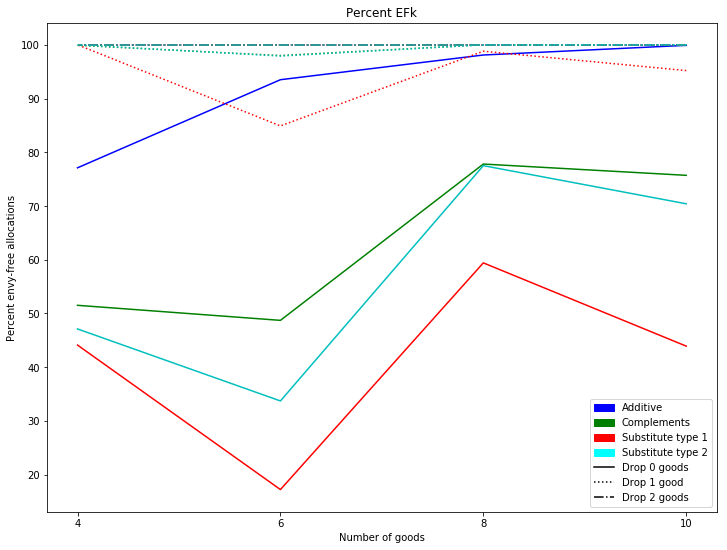

In [9]:
plt.figure(random.randint(0, 100), figsize=(12,9))
xticks = np.array([10, 8, 6, 4])
yticks = np.array(range(0, 101, 10))
plt.xticks(xticks)
plt.yticks(yticks)

plt.plot(xticks, getseries(dir_u, "ef0_percent"), 'b-')
plt.plot(xticks, getseries(dir_u, "ef1_percent"), 'b:')
plt.plot(xticks, getseries(dir_u, "ef2_percent"), 'b-.')
plt.plot(xticks, getseries(dir_uv, "ef0_percent"), 'g-')
plt.plot(xticks, getseries(dir_uv, "ef1_percent"), 'g:')
plt.plot(xticks, getseries(dir_uv, "ef2_percent"), 'g-.')
plt.plot(xticks, getseries(dir_us1, "ef0_percent"), 'r-')
plt.plot(xticks, getseries(dir_us1, "ef1_percent"), 'r:')
plt.plot(xticks, getseries(dir_us1, "ef2_percent"), 'r-.')
plt.plot(xticks, getseries(dir_us2, "ef0_percent"), 'c-')
plt.plot(xticks, getseries(dir_us2, "ef1_percent"), 'c:')
plt.plot(xticks, getseries(dir_us2, "ef2_percent"), 'c-.')

add_patch = mpatches.Patch(color='blue', label='Additive')
comp_patch = mpatches.Patch(color='green', label='Complements')
sub1_patch = mpatches.Patch(color='red', label='Substitute type 1')
sub2_patch = mpatches.Patch(color='cyan', label='Substitute type 2')
ef0_line = mlines.Line2D([], [], color='black', linestyle='-', label='Drop 0 goods')
ef1_line = mlines.Line2D([], [], color='black', linestyle=':', label='Drop 1 good')
ef2_line = mlines.Line2D([], [], color='black', linestyle='-.', label='Drop 2 goods')
plt.legend(handles=[add_patch, comp_patch, sub1_patch, sub2_patch, ef0_line, ef1_line, ef2_line], loc='best')

plt.title('Percent EFk')
plt.xlabel('Number of goods')
plt.ylabel('Percent envy-free allocations')
plt.show()

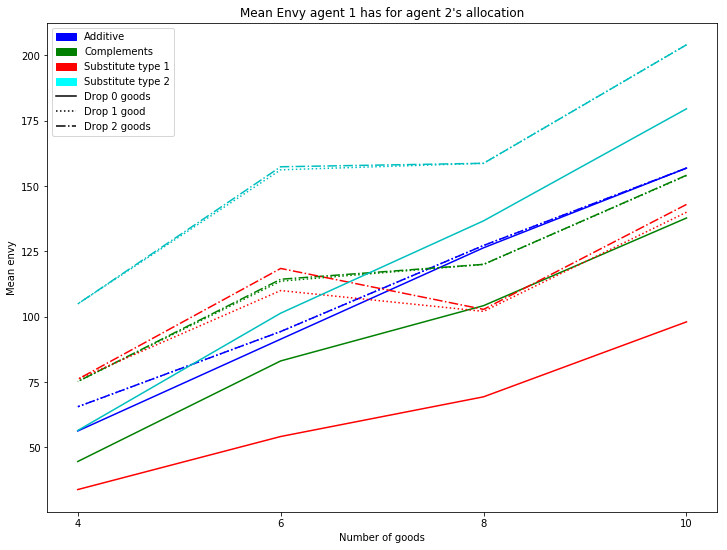

In [10]:
plt.figure(random.randint(0, 100), figsize=(12,9))
xticks = np.array([10, 8, 6, 4])
plt.xticks(xticks)

plt.plot(xticks, getseries(dir_u, "ef0_means")[:,0,1], 'b-')
plt.plot(xticks, getseries(dir_u, "ef1_means")[:,0,1], 'b:')
plt.plot(xticks, getseries(dir_u, "ef2_means")[:,0,1], 'b-.')
plt.plot(xticks, getseries(dir_uv, "ef0_means")[:,0,1], 'g-')
plt.plot(xticks, getseries(dir_uv, "ef1_means")[:,0,1], 'g:')
plt.plot(xticks, getseries(dir_uv, "ef2_means")[:,0,1], 'g-.')
plt.plot(xticks, getseries(dir_us1, "ef0_means")[:,0,1], 'r-')
plt.plot(xticks, getseries(dir_us1, "ef1_means")[:,0,1], 'r:')
plt.plot(xticks, getseries(dir_us1, "ef2_means")[:,0,1], 'r-.')
plt.plot(xticks, getseries(dir_us2, "ef0_means")[:,0,1], 'c-')
plt.plot(xticks, getseries(dir_us2, "ef1_means")[:,0,1], 'c:')
plt.plot(xticks, getseries(dir_us2, "ef2_means")[:,0,1], 'c-.')

add_patch = mpatches.Patch(color='blue', label='Additive')
comp_patch = mpatches.Patch(color='green', label='Complements')
sub1_patch = mpatches.Patch(color='red', label='Substitute type 1')
sub2_patch = mpatches.Patch(color='cyan', label='Substitute type 2')
ef0_line = mlines.Line2D([], [], color='black', linestyle='-', label='Drop 0 goods')
ef1_line = mlines.Line2D([], [], color='black', linestyle=':', label='Drop 1 good')
ef2_line = mlines.Line2D([], [], color='black', linestyle='-.', label='Drop 2 goods')
plt.legend(handles=[add_patch, comp_patch, sub1_patch, sub2_patch, ef0_line, ef1_line, ef2_line], loc='best')

plt.title('Mean Envy agent 1 has for agent 2\'s allocation')
plt.xlabel('Number of goods')
plt.ylabel('Mean envy')
plt.show()

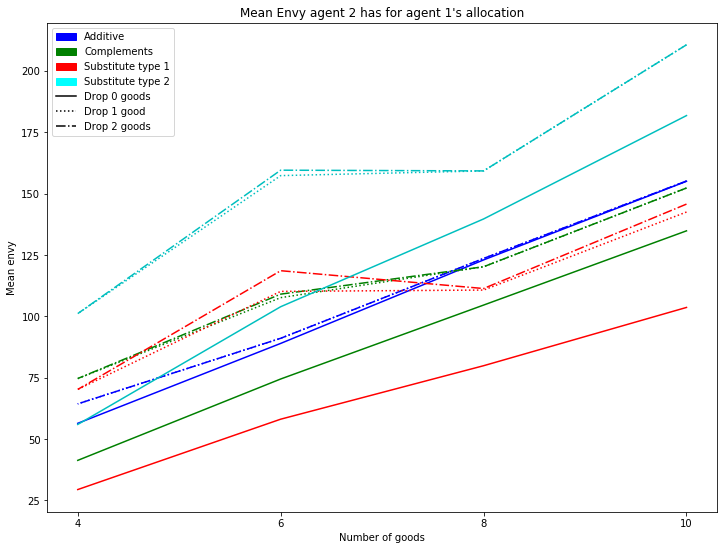

In [12]:
plt.figure(random.randint(0, 100), figsize=(12,9))
xticks = np.array([10, 8, 6, 4])
plt.xticks(xticks)

plt.plot(xticks, getseries(dir_u, "ef0_means")[:,1,0], 'b-')
plt.plot(xticks, getseries(dir_u, "ef1_means")[:,1,0], 'b:')
plt.plot(xticks, getseries(dir_u, "ef2_means")[:,1,0], 'b-.')
plt.plot(xticks, getseries(dir_uv, "ef0_means")[:,1,0], 'g-')
plt.plot(xticks, getseries(dir_uv, "ef1_means")[:,1,0], 'g:')
plt.plot(xticks, getseries(dir_uv, "ef2_means")[:,1,0], 'g-.')
plt.plot(xticks, getseries(dir_us1, "ef0_means")[:,1,0], 'r-')
plt.plot(xticks, getseries(dir_us1, "ef1_means")[:,1,0], 'r:')
plt.plot(xticks, getseries(dir_us1, "ef2_means")[:,1,0], 'r-.')
plt.plot(xticks, getseries(dir_us2, "ef0_means")[:,1,0], 'c-')
plt.plot(xticks, getseries(dir_us2, "ef1_means")[:,1,0], 'c:')
plt.plot(xticks, getseries(dir_us2, "ef2_means")[:,1,0], 'c-.')

add_patch = mpatches.Patch(color='blue', label='Additive')
comp_patch = mpatches.Patch(color='green', label='Complements')
sub1_patch = mpatches.Patch(color='red', label='Substitute type 1')
sub2_patch = mpatches.Patch(color='cyan', label='Substitute type 2')
ef0_line = mlines.Line2D([], [], color='black', linestyle='-', label='Drop 0 goods')
ef1_line = mlines.Line2D([], [], color='black', linestyle=':', label='Drop 1 good')
ef2_line = mlines.Line2D([], [], color='black', linestyle='-.', label='Drop 2 goods')
plt.legend(handles=[add_patch, comp_patch, sub1_patch, sub2_patch, ef0_line, ef1_line, ef2_line], loc='best')

plt.title('Mean Envy agent 2 has for agent 1\'s allocation')
plt.xlabel('Number of goods')
plt.ylabel('Mean envy')
plt.show()

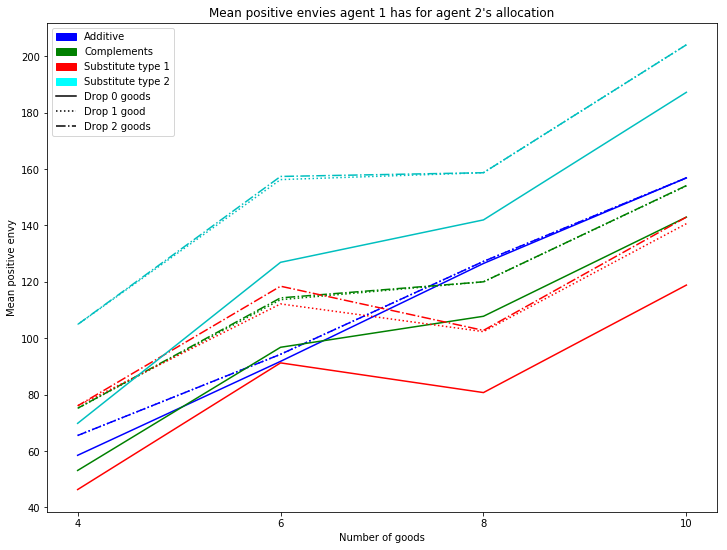

In [13]:
plt.figure(random.randint(0, 100), figsize=(12,9))
xticks = np.array([10, 8, 6, 4])
plt.xticks(xticks)

plt.plot(xticks, getseries(dir_u, "ef0_pos_means")[:,0,1], 'b-')
plt.plot(xticks, getseries(dir_u, "ef1_pos_means")[:,0,1], 'b:')
plt.plot(xticks, getseries(dir_u, "ef2_pos_means")[:,0,1], 'b-.')
plt.plot(xticks, getseries(dir_uv, "ef0_pos_means")[:,0,1], 'g-')
plt.plot(xticks, getseries(dir_uv, "ef1_pos_means")[:,0,1], 'g:')
plt.plot(xticks, getseries(dir_uv, "ef2_pos_means")[:,0,1], 'g-.')
plt.plot(xticks, getseries(dir_us1, "ef0_pos_means")[:,0,1], 'r-')
plt.plot(xticks, getseries(dir_us1, "ef1_pos_means")[:,0,1], 'r:')
plt.plot(xticks, getseries(dir_us1, "ef2_pos_means")[:,0,1], 'r-.')
plt.plot(xticks, getseries(dir_us2, "ef0_pos_means")[:,0,1], 'c-')
plt.plot(xticks, getseries(dir_us2, "ef1_pos_means")[:,0,1], 'c:')
plt.plot(xticks, getseries(dir_us2, "ef2_pos_means")[:,0,1], 'c-.')

add_patch = mpatches.Patch(color='blue', label='Additive')
comp_patch = mpatches.Patch(color='green', label='Complements')
sub1_patch = mpatches.Patch(color='red', label='Substitute type 1')
sub2_patch = mpatches.Patch(color='cyan', label='Substitute type 2')
ef0_line = mlines.Line2D([], [], color='black', linestyle='-', label='Drop 0 goods')
ef1_line = mlines.Line2D([], [], color='black', linestyle=':', label='Drop 1 good')
ef2_line = mlines.Line2D([], [], color='black', linestyle='-.', label='Drop 2 goods')
plt.legend(handles=[add_patch, comp_patch, sub1_patch, sub2_patch, ef0_line, ef1_line, ef2_line], loc='best')

plt.title('Mean positive envies agent 1 has for agent 2\'s allocation')
plt.xlabel('Number of goods')
plt.ylabel('Mean positive envy')
plt.show()

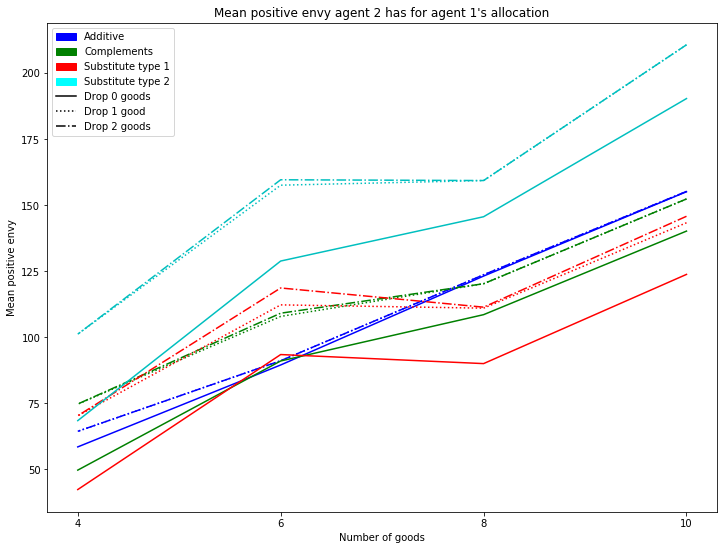

In [14]:
plt.figure(random.randint(0, 100), figsize=(12,9))
xticks = np.array([10, 8, 6, 4])
plt.xticks(xticks)

plt.plot(xticks, getseries(dir_u, "ef0_pos_means")[:,1,0], 'b-')
plt.plot(xticks, getseries(dir_u, "ef1_pos_means")[:,1,0], 'b:')
plt.plot(xticks, getseries(dir_u, "ef2_pos_means")[:,1,0], 'b-.')
plt.plot(xticks, getseries(dir_uv, "ef0_pos_means")[:,1,0], 'g-')
plt.plot(xticks, getseries(dir_uv, "ef1_pos_means")[:,1,0], 'g:')
plt.plot(xticks, getseries(dir_uv, "ef2_pos_means")[:,1,0], 'g-.')
plt.plot(xticks, getseries(dir_us1, "ef0_pos_means")[:,1,0], 'r-')
plt.plot(xticks, getseries(dir_us1, "ef1_pos_means")[:,1,0], 'r:')
plt.plot(xticks, getseries(dir_us1, "ef2_pos_means")[:,1,0], 'r-.')
plt.plot(xticks, getseries(dir_us2, "ef0_pos_means")[:,1,0], 'c-')
plt.plot(xticks, getseries(dir_us2, "ef1_pos_means")[:,1,0], 'c:')
plt.plot(xticks, getseries(dir_us2, "ef2_pos_means")[:,1,0], 'c-.')

add_patch = mpatches.Patch(color='blue', label='Additive')
comp_patch = mpatches.Patch(color='green', label='Complements')
sub1_patch = mpatches.Patch(color='red', label='Substitute type 1')
sub2_patch = mpatches.Patch(color='cyan', label='Substitute type 2')
ef0_line = mlines.Line2D([], [], color='black', linestyle='-', label='Drop 0 goods')
ef1_line = mlines.Line2D([], [], color='black', linestyle=':', label='Drop 1 good')
ef2_line = mlines.Line2D([], [], color='black', linestyle='-.', label='Drop 2 goods')
plt.legend(handles=[add_patch, comp_patch, sub1_patch, sub2_patch, ef0_line, ef1_line, ef2_line], loc='best')

plt.title('Mean positive envy agent 2 has for agent 1\'s allocation')
plt.xlabel('Number of goods')
plt.ylabel('Mean positive envy')
plt.show()

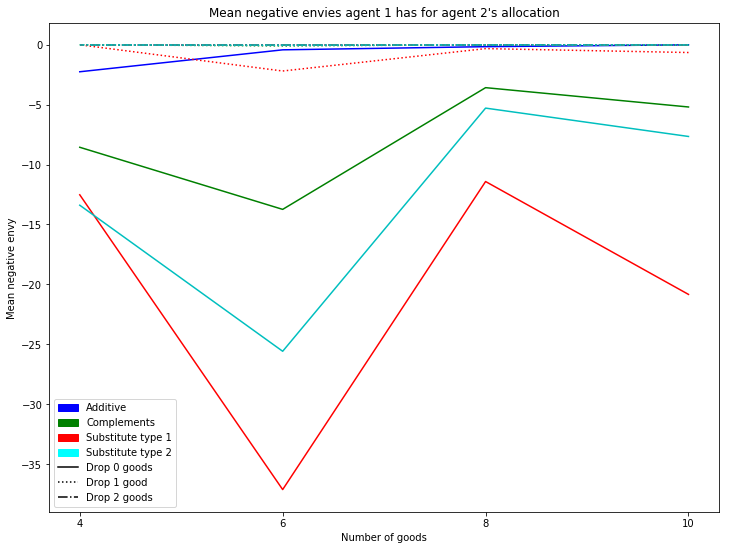

In [15]:
plt.figure(random.randint(0, 100), figsize=(12,9))
xticks = np.array([10, 8, 6, 4])
plt.xticks(xticks)

plt.plot(xticks, getseries(dir_u, "ef0_neg_means")[:,0,1], 'b-')
plt.plot(xticks, getseries(dir_u, "ef1_neg_means")[:,0,1], 'b:')
plt.plot(xticks, getseries(dir_u, "ef2_neg_means")[:,0,1], 'b-.')
plt.plot(xticks, getseries(dir_uv, "ef0_neg_means")[:,0,1], 'g-')
plt.plot(xticks, getseries(dir_uv, "ef1_neg_means")[:,0,1], 'g:')
plt.plot(xticks, getseries(dir_uv, "ef2_neg_means")[:,0,1], 'g-.')
plt.plot(xticks, getseries(dir_us1, "ef0_neg_means")[:,0,1], 'r-')
plt.plot(xticks, getseries(dir_us1, "ef1_neg_means")[:,0,1], 'r:')
plt.plot(xticks, getseries(dir_us1, "ef2_neg_means")[:,0,1], 'r-.')
plt.plot(xticks, getseries(dir_us2, "ef0_neg_means")[:,0,1], 'c-')
plt.plot(xticks, getseries(dir_us2, "ef1_neg_means")[:,0,1], 'c:')
plt.plot(xticks, getseries(dir_us2, "ef2_neg_means")[:,0,1], 'c-.')

add_patch = mpatches.Patch(color='blue', label='Additive')
comp_patch = mpatches.Patch(color='green', label='Complements')
sub1_patch = mpatches.Patch(color='red', label='Substitute type 1')
sub2_patch = mpatches.Patch(color='cyan', label='Substitute type 2')
ef0_line = mlines.Line2D([], [], color='black', linestyle='-', label='Drop 0 goods')
ef1_line = mlines.Line2D([], [], color='black', linestyle=':', label='Drop 1 good')
ef2_line = mlines.Line2D([], [], color='black', linestyle='-.', label='Drop 2 goods')
plt.legend(handles=[add_patch, comp_patch, sub1_patch, sub2_patch, ef0_line, ef1_line, ef2_line], loc='best')

plt.title('Mean negative envies agent 1 has for agent 2\'s allocation')
plt.xlabel('Number of goods')
plt.ylabel('Mean negative envy')
plt.show()

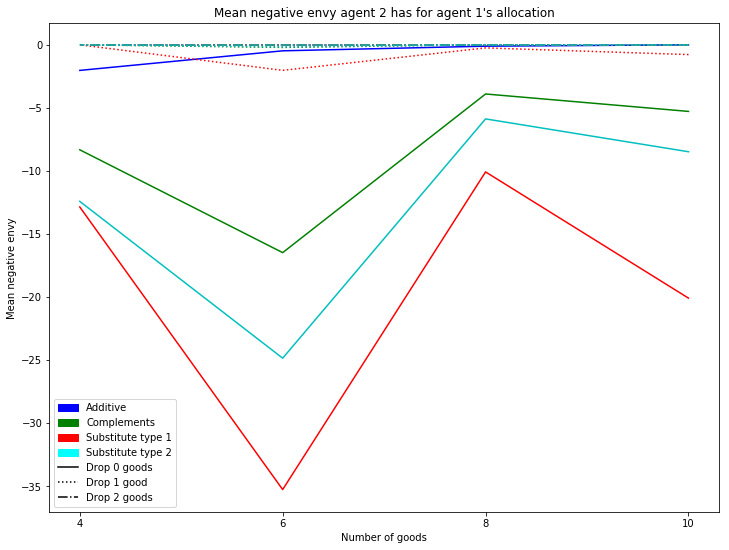

In [16]:
plt.figure(random.randint(0, 100), figsize=(12,9))
xticks = np.array([10, 8, 6, 4])
plt.xticks(xticks)

plt.plot(xticks, getseries(dir_u, "ef0_neg_means")[:,1,0], 'b-')
plt.plot(xticks, getseries(dir_u, "ef1_neg_means")[:,1,0], 'b:')
plt.plot(xticks, getseries(dir_u, "ef2_neg_means")[:,1,0], 'b-.')
plt.plot(xticks, getseries(dir_uv, "ef0_neg_means")[:,1,0], 'g-')
plt.plot(xticks, getseries(dir_uv, "ef1_neg_means")[:,1,0], 'g:')
plt.plot(xticks, getseries(dir_uv, "ef2_neg_means")[:,1,0], 'g-.')
plt.plot(xticks, getseries(dir_us1, "ef0_neg_means")[:,1,0], 'r-')
plt.plot(xticks, getseries(dir_us1, "ef1_neg_means")[:,1,0], 'r:')
plt.plot(xticks, getseries(dir_us1, "ef2_neg_means")[:,1,0], 'r-.')
plt.plot(xticks, getseries(dir_us2, "ef0_neg_means")[:,1,0], 'c-')
plt.plot(xticks, getseries(dir_us2, "ef1_neg_means")[:,1,0], 'c:')
plt.plot(xticks, getseries(dir_us2, "ef2_neg_means")[:,1,0], 'c-.')

add_patch = mpatches.Patch(color='blue', label='Additive')
comp_patch = mpatches.Patch(color='green', label='Complements')
sub1_patch = mpatches.Patch(color='red', label='Substitute type 1')
sub2_patch = mpatches.Patch(color='cyan', label='Substitute type 2')
ef0_line = mlines.Line2D([], [], color='black', linestyle='-', label='Drop 0 goods')
ef1_line = mlines.Line2D([], [], color='black', linestyle=':', label='Drop 1 good')
ef2_line = mlines.Line2D([], [], color='black', linestyle='-.', label='Drop 2 goods')
plt.legend(handles=[add_patch, comp_patch, sub1_patch, sub2_patch, ef0_line, ef1_line, ef2_line], loc='best')

plt.title('Mean negative envy agent 2 has for agent 1\'s allocation')
plt.xlabel('Number of goods')
plt.ylabel('Mean negative envy')
plt.show()

0


<Figure size 432x288 with 0 Axes>

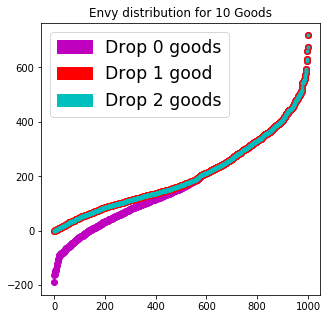

1


<Figure size 432x288 with 0 Axes>

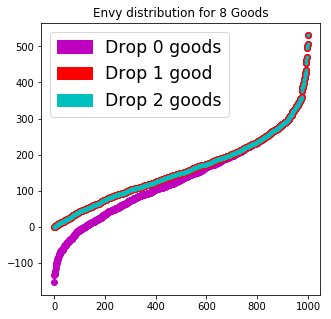

2


<Figure size 432x288 with 0 Axes>

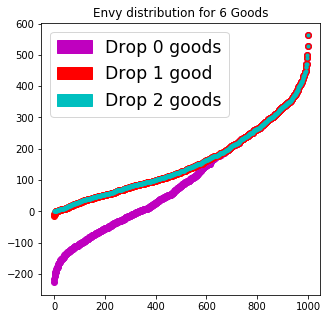

3


<Figure size 432x288 with 0 Axes>

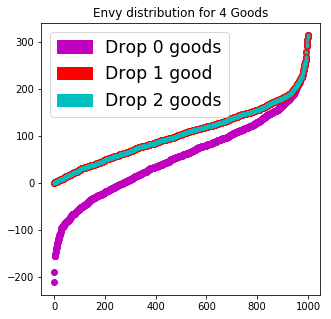

In [52]:
# for f in dir_u + dir_uv + dir_us1 + dir_us2:
for k, f in enumerate(dir_u):
    Us, Vs, As = readdat(f)
    Us = np.array(Us)
    Vs = np.array(Vs)
    As = np.array(As)

    envy_map = [[], []]
    envy1_map = [[], []]
    envy2_map = [[], []]

    for i in range(len(As)):
        e0 = efcalcs.envyMap(efcalcs.complementing_utility, As[i], Us[i], Vs[i])
        e1 = efcalcs.envyMap_upto1(efcalcs.complementing_utility, As[i], Us[i], Vs[i])
        e2 = efcalcs.envyMap_upto2(efcalcs.complementing_utility, As[i], Us[i], Vs[i])
        envy_map[0].append(e0[0][1])
        envy_map[1].append(e0[1][0])
        envy1_map[0].append(e1[0][1])
        envy1_map[1].append(e1[1][0])
        envy2_map[0].append(e2[0][1])
        envy2_map[1].append(e2[1][0])

    envy_map = np.array(envy_map)
    envy1_map = np.array(envy1_map)
    envy2_map = np.array(envy2_map)
    
    envy_zip = np.vstack((envy_map[0], envy1_map[0], envy2_map[0]))
    envy_zip = envy_zip.T[envy_zip[0,:].argsort()]
    envy_zip = envy_zip.T

    envy_map[0].sort()
#     envy_map[1].sort()
    envy1_map[0].sort()
#     envy1_map[1].sort()
    envy2_map[0].sort()
#     envy2_map[1].sort()
    
    plt.figure(51)
    plt.figure(figsize=(5, 5))
#     plt.plot(range(0, len(envy_zip[0, :]), 1), envy_zip[0, :], 'b.', label="e0[0]")
    plt.plot(range(0, len(envy_map[0, :]), 1), envy_map[0, :], 'mo', label="Drop 0 goods")
    # plt.plot(range(0, len(envy_map[1, 0:500]), 1), envy_map[1, 0:500], 'ro', label="e0[1]")

#     plt.plot(range(0, len(envy_zip[1, :]), 1), envy_zip[1, :], 'r.', label="e1[0]")
    plt.plot(range(0, len(envy1_map[0, :]), 1), envy1_map[0, :], 'ro', label="Drop 1 good")
    # plt.plot(range(0, len(envy1_map[1, 0:500]), 1), envy1_map[1, 0:500], 'co', label="e1[1]")

#     plt.plot(range(0, len(envy_zip[2, :]), 1), envy_zip[2, :], 'g.', label="e2[0]")
    plt.plot(range(0, len(envy2_map[0, :]), 1), envy2_map[0, :], 'c.', label="Drop 2 goods")
    # plt.plot(range(0, len(envy2_map[1, 0:500]), 1), envy2_map[1, 0:500], 'yo', label="e2[1]")
    
    print(k)
    plt.title("Envy distribution for " + str(10-k*2) + " Goods")

    ef0_patch = mpatches.Patch(color='m', label='Drop 0 goods')
    ef1_patch = mpatches.Patch(color='r', label='Drop 1 good')
    ef2_patch = mpatches.Patch(color='c', label='Drop 2 goods')
    plt.legend(handles=[ef0_patch, ef1_patch, ef2_patch], loc='best', prop={'size': 'xx-large'})
    plt.show()